In [1]:
import pandas as pd
from collections import defaultdict
from collections import Counter
from operator import itemgetter

In [2]:
vegas_tagged = pd.read_csv("VegasBusinessTagging.csv")
vegas_tagged = vegas_tagged.drop(['Unnamed: 0','reviews'], axis=1)

In [3]:
print(len(vegas_tagged))
vegas_tagged.head()

6118


,business_id,topics
0,toToUz3HgJjEinwD8_3dGQ,"['hotel', 'mcmuffin', 'line']"
1,Ao2V326FZWP4MCsTwUUTNw,"['bbq', 'korean']"
2,i0EtEzlEkOho6YcLG29bvw,"['register', 'worker', 'mcdonald', 'woman']"
3,mYsswaRTS-5NFUifYCW0-Q,"['everything', 'oyster', 'spicy', 'hr', 'tuna'..."
4,Zsxx8hT5-4wObIpZrFmfhA,"['barista', 'starbucks', 'card', 'people', 'ba..."


In [4]:
topics = defaultdict(int)
for index, item in vegas_tagged.iterrows():
    topic = vegas_tagged['topics'][index]
    temp = topic.replace("'", "").strip("[,]").replace(" ", "").split(',')
    
    for item in temp:
        topics[item] += 1

In [5]:
topics = dict(topics)
print(len(topics))

3264


In [6]:
print(topics)

{'hotel': 68, 'mcmuffin': 2, 'line': 134, 'bbq': 92, 'korean': 3, 'register': 10, 'worker': 17, 'mcdonald': 33, 'woman': 4, 'everything': 78, 'oyster': 18, 'spicy': 137, 'hr': 3, 'tuna': 29, 'match': 3, 'people': 135, 'speciality': 1, 'barista': 4, 'starbucks': 132, 'card': 44, 'bar': 300, 'funny': 1, 'phone': 21, 'pizza': 389, 'hut': 9, 'jinx': 1, 'comfort': 1, 'lawrence': 1, 'butcher': 4, 'market': 61, 'counter': 32, 'water': 75, 'bottle': 19, 'halal': 4, 'debit': 4, 'smell': 8, 'thai': 98, 'chicken': 608, 'area': 114, 'grocery': 45, 'beer': 128, 'stop': 24, 'craft': 4, 'corner': 9, 'advice': 1, 'useless': 1, 'tank': 2, 'guy': 51, 'amazon': 1, 'cici': 4, 'staff': 129, 'slice': 92, 'buffet': 103, 'field': 2, 'doozie': 1, 'day': 135, 'type': 11, 'sugar': 24, 'cooky': 26, 'sample': 20, 'anyone': 3, 'portobello': 1, 'rigatoni': 1, 'wine': 70, 'dinner': 85, 'refill': 9, 'soda': 22, 'appetite': 1, 'resturant': 1, 'quizno': 4, 'sandwich': 306, 'result': 3, 'weekend': 5, 'raise': 1, '': 43, 

In [17]:
topics_tuples = [(k, v) for k, v in topics.items()]

In [18]:
print(topics_tuples)

[('hotel', 68), ('mcmuffin', 2), ('line', 134), ('bbq', 92), ('korean', 3), ('register', 10), ('worker', 17), ('mcdonald', 33), ('woman', 4), ('everything', 78), ('oyster', 18), ('spicy', 137), ('hr', 3), ('tuna', 29), ('match', 3), ('people', 135), ('speciality', 1), ('barista', 4), ('starbucks', 132), ('card', 44), ('bar', 300), ('funny', 1), ('phone', 21), ('pizza', 389), ('hut', 9), ('jinx', 1), ('comfort', 1), ('lawrence', 1), ('butcher', 4), ('market', 61), ('counter', 32), ('water', 75), ('bottle', 19), ('halal', 4), ('debit', 4), ('smell', 8), ('thai', 98), ('chicken', 608), ('area', 114), ('grocery', 45), ('beer', 128), ('stop', 24), ('craft', 4), ('corner', 9), ('advice', 1), ('useless', 1), ('tank', 2), ('guy', 51), ('amazon', 1), ('cici', 4), ('staff', 129), ('slice', 92), ('buffet', 103), ('field', 2), ('doozie', 1), ('day', 135), ('type', 11), ('sugar', 24), ('cooky', 26), ('sample', 20), ('anyone', 3), ('portobello', 1), ('rigatoni', 1), ('wine', 70), ('dinner', 85), ('r

In [27]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

In [50]:
from PIL import Image
from os import path
import os

In [51]:
d = path.dirname(os.getcwd())

In [72]:
dinner_plate = np.array(Image.open("food.png"))

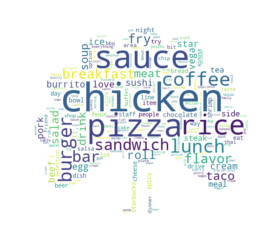

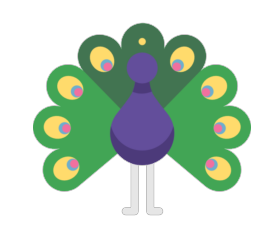

In [73]:
wordcloud = WordCloud(mask=dinner_plate, background_color="white")
wordcloud.generate_from_frequencies(frequencies=topics)
#image_colors = ImageColorGenerator(dinner_plate)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(dinner_plate, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

In [6]:
sorted(topics.items(), key=itemgetter(1), reverse=True)

[('chicken', 608),
 ('pizza', 389),
 ('sauce', 385),
 ('rice', 337),
 ('coffee', 328),
 ('burger', 316),
 ('lunch', 307),
 ('sandwich', 306),
 ('bar', 300),
 ('flavor', 300),
 ('breakfast', 299),
 ('fry', 278),
 ('taco', 250),
 ('roll', 249),
 ('salad', 232),
 ('meat', 230),
 ('drink', 226),
 ('soup', 213),
 ('burrito', 196),
 ('cream', 189),
 ('sushi', 187),
 ('star', 181),
 ('love', 178),
 ('vega', 178),
 ('ice', 173),
 ('beef', 172),
 ('pork', 170),
 ('egg', 170),
 ('steak', 164),
 ('meal', 164),
 ('tea', 162),
 ('side', 160),
 ('night', 158),
 ('chocolate', 157),
 ('hour', 155),
 ('bowl', 149),
 ('drive', 139),
 ('dish', 139),
 ('eat', 138),
 ('spicy', 137),
 ('try', 137),
 ('bread', 136),
 ('people', 135),
 ('day', 135),
 ('cheese', 135),
 ('line', 134),
 ('starbucks', 132),
 ('shrimp', 132),
 ('item', 131),
 ('staff', 129),
 ('beer', 128),
 ('lot', 127),
 ('area', 114),
 ('way', 114),
 ('salsa', 114),
 ('buffet', 103),
 ('selection', 99),
 ('thai', 98),
 ('option', 96),
 ('chip',

In [7]:
sub_topics = Counter(topics).most_common(200)
len(sub_topics)

200

In [8]:
print(sub_topics)

[('chicken', 608), ('pizza', 389), ('sauce', 385), ('rice', 337), ('coffee', 328), ('burger', 316), ('lunch', 307), ('sandwich', 306), ('bar', 300), ('flavor', 300), ('breakfast', 299), ('fry', 278), ('taco', 250), ('roll', 249), ('salad', 232), ('meat', 230), ('drink', 226), ('soup', 213), ('burrito', 196), ('cream', 189), ('sushi', 187), ('star', 181), ('love', 178), ('vega', 178), ('ice', 173), ('beef', 172), ('pork', 170), ('egg', 170), ('steak', 164), ('meal', 164), ('tea', 162), ('side', 160), ('night', 158), ('chocolate', 157), ('hour', 155), ('bowl', 149), ('drive', 139), ('dish', 139), ('eat', 138), ('spicy', 137), ('try', 137), ('bread', 136), ('people', 135), ('day', 135), ('cheese', 135), ('line', 134), ('starbucks', 132), ('shrimp', 132), ('item', 131), ('staff', 129), ('beer', 128), ('lot', 127), ('area', 114), ('way', 114), ('salsa', 114), ('buffet', 103), ('selection', 99), ('thai', 98), ('option', 96), ('chip', 94), ('taste', 93), ('bbq', 92), ('slice', 92), ('friend',

In [76]:
business = pd.read_csv("yelp_business.csv")

In [10]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [11]:
business.loc[business['business_id'] == '7qSJAE_Z6guAGWCtOC7Yag']

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
43659,7qSJAE_Z6guAGWCtOC7Yag,"""DMV Made Easy""",Spring Valley,"""8615 W Flamingo Rd""",Las Vegas,NV,89147,36.114443,-115.279586,4.0,140,1,Food;Departments of Motor Vehicles;Smog Check ...


In [12]:
vegas_tagged.loc[vegas_tagged['business_id'] == 'toToUz3HgJjEinwD8_3dGQ']['topics'][0]

"['hotel', 'mcmuffin', 'line']"

In [78]:
vegas_tagged['subcategories'] = ""

In [79]:
vegas_tagged['subtopics'] = ""

In [80]:
categories = []
for index, item in vegas_tagged.iterrows():
    temp = business.loc[business['business_id'] == vegas_tagged['business_id'][index]]['categories'].get_values()[0]
    temp = temp.split(";")
    vegas_tagged.set_value(index, 'subcategories', temp)
    
    for t in temp:
        if t == 'Departments of Motor Vehicles':
            print(item)
        
        if t not in categories and t not in 'FoodRestaurants':
            categories.append(t)

business_id                                 7qSJAE_Z6guAGWCtOC7Yag
topics                              ['registration', 'car', 'dmv']
subcategories    [Food, Departments of Motor Vehicles, Smog Che...
subtopics                                                         
Name: 3621, dtype: object


In [81]:
print(categories)

['Fast Food', 'Burgers', 'Korean', 'Barbeque', 'Tapas Bars', 'Coffee & Tea', 'Bakeries', 'American (Traditional)', 'Chicken Wings', 'Pizza', 'Italian', 'Sandwiches', 'Middle Eastern', 'Mediterranean', 'International Grocery', 'Grocery', 'Thai', 'Chinese', 'Drugstores', 'Shopping', 'Beer', 'Wine & Spirits', 'Convenience Stores', 'Automotive', 'Gas Stations', 'Health & Medical', 'Specialty Food', 'Health Markets', 'Nutritionists', 'Food Stands', 'Food Delivery Services', 'Indian', 'American (New)', 'Sushi Bars', 'Japanese', 'Donuts', 'Juice Bars & Smoothies', 'French', 'Seafood', 'Caribbean', 'Breakfast & Brunch', 'Halal', 'Vegetarian', 'Greek', 'Hawaiian', 'Ice Cream & Frozen Yogurt', 'Mexican', 'Delis', 'Latin American', 'Desserts', 'Hot Dogs', 'Car Wash', 'Adult Entertainment', 'Performing Arts', 'Arts & Entertainment', 'Asian Fusion', 'Nightlife', 'Buffets', 'Shaved Ice', 'Cafes', 'Chicken Shop', 'Steakhouses', 'Ethnic Food', 'Meat Shops', 'Fruits & Veggies', 'Seafood Markets', 'Gela

In [82]:
sub_topics = Counter(topics).most_common(200)
len(sub_topics)

200

In [83]:
sub_categories = Counter(categories).most_common(200)

In [16]:
vegas_tagged.head()

,business_id,topics,subcategories,subtopics
0,toToUz3HgJjEinwD8_3dGQ,"['hotel', 'mcmuffin', 'line']","[Food, Restaurants, Fast Food, Burgers]",
1,Ao2V326FZWP4MCsTwUUTNw,"['bbq', 'korean']","[Korean, Barbeque, Restaurants]",
2,i0EtEzlEkOho6YcLG29bvw,"['register', 'worker', 'mcdonald', 'woman']","[Fast Food, Burgers, Restaurants]",
3,mYsswaRTS-5NFUifYCW0-Q,"['everything', 'oyster', 'spicy', 'hr', 'tuna'...","[Restaurants, Tapas Bars]",
4,Zsxx8hT5-4wObIpZrFmfhA,"['barista', 'starbucks', 'card', 'people', 'ba...","[Coffee & Tea, Food, Bakeries]",


In [17]:
len(categories)

317

In [18]:
for index, item in vegas_tagged.iterrows():
    topic = vegas_tagged['topics'][index]
    temp = topic.replace("'", "").strip("[,]").replace(" ", "").split(',')
    temp2 = []
    
    for t in temp:
        if t not in sub_topics:
            temp2.append(t)
    
    vegas_tagged.set_value(index, 'subtopics', temp2)

In [19]:
vegas_tagged = vegas_tagged.drop(['topics'], axis=1)
vegas_tagged.head()

,business_id,subcategories,subtopics
0,toToUz3HgJjEinwD8_3dGQ,"[Food, Restaurants, Fast Food, Burgers]","[hotel, mcmuffin, line]"
1,Ao2V326FZWP4MCsTwUUTNw,"[Korean, Barbeque, Restaurants]","[bbq, korean]"
2,i0EtEzlEkOho6YcLG29bvw,"[Fast Food, Burgers, Restaurants]","[register, worker, mcdonald, woman]"
3,mYsswaRTS-5NFUifYCW0-Q,"[Restaurants, Tapas Bars]","[everything, oyster, spicy, hr, tuna, match, p..."
4,Zsxx8hT5-4wObIpZrFmfhA,"[Coffee & Tea, Food, Bakeries]","[barista, starbucks, card, people, bar, funny]"


In [20]:
subtopics = [x[0] for x in sub_topics]

In [21]:
df_categories = pd.DataFrame(columns=categories)
df_subtopics = pd.DataFrame(columns=subtopics)

In [22]:
df_combined = pd.concat([vegas_tagged, df_categories, df_subtopics])
df_combined.head()

,,Acai Bowls,Active Life,Adult Entertainment,Afghan,African,Airport Terminals,Airports,American (New),American (Traditional),...,waffle,waiter,water,way,wine,work,wrap,year,yelp,yogurt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_combined.isnull().sum()

                          6118
Acai Bowls                6118
Active Life               6118
Adult Entertainment       6118
Afghan                    6118
African                   6118
Airport Terminals         6118
Airports                  6118
American (New)            6118
American (Traditional)    6118
Amusement Parks           6118
Arabian                   6118
Arcades                   6118
Argentine                 6118
Armenian                  6118
Arts & Entertainment      6118
Asian Fusion              6118
Auto Detailing            6118
Auto Glass Services       6118
Auto Repair               6118
Automotive                6118
Backshop                  6118
Bagels                    6118
Bakeries                  6118
Bangladeshi               6118
Barbeque                  6118
Bars                      6118
Basque                    6118
Beauty & Spas             6118
Beer                      6118
                          ... 
subtopics                    0
subway  

In [24]:
for index, item in df_combined.iterrows():
    for i in item['subcategories']:
        if i in categories:
            df_combined.set_value(index, i, 1)
            
    for i in item['subtopics']:
        if i in subtopics:
            df_combined.set_value(index, i, 1)

In [25]:
df_combined.head()

,,Acai Bowls,Active Life,Adult Entertainment,Afghan,African,Airport Terminals,Airports,American (New),American (Traditional),...,waffle,waiter,water,way,wine,work,wrap,year,yelp,yogurt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_combined1 = df_combined.fillna(0)
df_combined1.head()

,,Acai Bowls,Active Life,Adult Entertainment,Afghan,African,Airport Terminals,Airports,American (New),American (Traditional),...,waffle,waiter,water,way,wine,work,wrap,year,yelp,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_combined1 = df_combined1.drop(['subcategories', 'subtopics', ''], axis=1) # business attributes matrix

In [28]:
business_attributes = df_combined1

In [29]:
vegas_sentiments = pd.read_csv("Vegas_wSentiments.csv")
vegas_sentiments.head()

,Unnamed: 0,Unnamed: 0.1,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,user_review_count,...,followers_count,tip_count,category,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent,text,sentiment
0,0,18277,QgSf2JvYz-M4PU2yuJjxNQ,nOTl4aPC4tKHK35T3bNauQ,9Jc3W0aR9Xf2gcHI0rEXsw,1,Las Vegas,3.0,57,148.0,...,50.0,0.0,Restaurants,127,78,49,31680,95,"After being scared away from Rock & Rita's, we...",0.001898
1,1,18280,s8j02t2pcqtGzZTwRwYsHA,gU_sKjppz47562zsiccDLw,9Jc3W0aR9Xf2gcHI0rEXsw,5,Las Vegas,3.0,57,320.0,...,841.0,0.0,Restaurants,127,78,49,31680,95,The Garden Grill is located inside the Circus ...,0.607713
2,2,18292,V2m_KNRyfpRjvf_pho865w,TBEiWGQoVXCq5sYuOzeBkw,9Jc3W0aR9Xf2gcHI0rEXsw,3,Las Vegas,3.0,57,351.0,...,845.0,165.0,Restaurants,127,78,49,31680,95,"Eeehhhh, this restaurant isn't all that great....",0.008583
3,3,18296,p4zYNVVX7Y0aCYfWv606Pg,o0_SrfBy_H5UY98auVa3EQ,9Jc3W0aR9Xf2gcHI0rEXsw,3,Las Vegas,3.0,57,267.0,...,168.0,0.0,Restaurants,127,78,49,31680,95,Recipe for the Rose Garden Hard Float:\r\r\n\r...,0.129926
4,4,18300,i4SIw-shVZW2oxUuNhmoKQ,I9e80hahLUuqyvM0ft3EdA,9Jc3W0aR9Xf2gcHI0rEXsw,2,Las Vegas,3.0,57,114.0,...,44.0,0.0,Restaurants,127,78,49,31680,95,"Our service here was so slow, we thought we'd ...",0.013002


In [30]:
vegas_sentiments.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'review_id', 'user_id',
       'business_id', 'review_rating', 'city', 'business_rating',
       'business_review_count', 'user_review_count', 'elite',
       'user_average_stars', 'Rep', 'compliments', 'followers_count',
       'tip_count', 'category', 'checkins', 'weekday_checkins',
       'weekend_checkins', 'proximity', 'proximity_percent', 'text',
       'sentiment'], dtype=object)

In [31]:
vegas_sentiments.drop(vegas_sentiments.columns.difference(['user_id', 'business_id', 'review_rating', 'sentiment']), 1, inplace=True)

In [32]:
vegas_sentiments.head()

,user_id,business_id,review_rating,sentiment
0,nOTl4aPC4tKHK35T3bNauQ,9Jc3W0aR9Xf2gcHI0rEXsw,1,0.001898
1,gU_sKjppz47562zsiccDLw,9Jc3W0aR9Xf2gcHI0rEXsw,5,0.607713
2,TBEiWGQoVXCq5sYuOzeBkw,9Jc3W0aR9Xf2gcHI0rEXsw,3,0.008583
3,o0_SrfBy_H5UY98auVa3EQ,9Jc3W0aR9Xf2gcHI0rEXsw,3,0.129926
4,I9e80hahLUuqyvM0ft3EdA,9Jc3W0aR9Xf2gcHI0rEXsw,2,0.013002


In [33]:
businesses = pd.DataFrame(columns=vegas_tagged['business_id'])
businesses.head()

business_id,toToUz3HgJjEinwD8_3dGQ,Ao2V326FZWP4MCsTwUUTNw,i0EtEzlEkOho6YcLG29bvw,mYsswaRTS-5NFUifYCW0-Q,Zsxx8hT5-4wObIpZrFmfhA,CON1tC_YaTuF3fazCjEivA,uIbZjRRqR1OR-t2NBCa1Wg,oupRStsBHVRsxhrEm8-DgA,dJyvE8huwBlyUWcjPJJFDQ,MtHqRoJW81oJ0hzVieqsDQ,...,Fi-2ruy5x600SX4avnrFuA,Jt28TYWanzKrJYYr0Tf1MQ,T0Uw6vwwfO3el29wBoDamQ,Knnc473zh8m7IBC0oLTHkg,B0Vm2tge4I2JJlZhD4sl0Q,hojZyJk1Wf2UE2CpG7cgIg,HSumjjzNb_gltxMe4-zd5w,GWNmYFQw3WitfTPt5uGMvQ,NFMD_-wFrbfdhTcdHPDCZQ,2HxaDXZmAOH6LiuzGgNdPA


In [34]:
vegas_sentiments['rating'] = vegas_sentiments['review_rating'] + vegas_sentiments['sentiment'] * 3

In [35]:
vegas_sentiments.head()

,user_id,business_id,review_rating,sentiment,rating
0,nOTl4aPC4tKHK35T3bNauQ,9Jc3W0aR9Xf2gcHI0rEXsw,1,0.001898,1.005694
1,gU_sKjppz47562zsiccDLw,9Jc3W0aR9Xf2gcHI0rEXsw,5,0.607713,6.823139
2,TBEiWGQoVXCq5sYuOzeBkw,9Jc3W0aR9Xf2gcHI0rEXsw,3,0.008583,3.025750
3,o0_SrfBy_H5UY98auVa3EQ,9Jc3W0aR9Xf2gcHI0rEXsw,3,0.129926,3.389779
4,I9e80hahLUuqyvM0ft3EdA,9Jc3W0aR9Xf2gcHI0rEXsw,2,0.013002,2.039005


In [36]:
vegas_sentiments2 = vegas_sentiments.drop(['review_rating', 'sentiment'], axis=1)
vegas_sentiments2.head()

,user_id,business_id,rating
0,nOTl4aPC4tKHK35T3bNauQ,9Jc3W0aR9Xf2gcHI0rEXsw,1.005694
1,gU_sKjppz47562zsiccDLw,9Jc3W0aR9Xf2gcHI0rEXsw,6.823139
2,TBEiWGQoVXCq5sYuOzeBkw,9Jc3W0aR9Xf2gcHI0rEXsw,3.025750
3,o0_SrfBy_H5UY98auVa3EQ,9Jc3W0aR9Xf2gcHI0rEXsw,3.389779
4,I9e80hahLUuqyvM0ft3EdA,9Jc3W0aR9Xf2gcHI0rEXsw,2.039005


In [37]:
vegas_sentiments2 = vegas_sentiments2.pivot(index='user_id', columns='business_id', values='rating')
vegas_sentiments2.head()

business_id,-95mbLJsa0CxXhpaNL4LvA,-IWsoxH7mLJTTpU5MmWY4w,-K82LBrI3H0FVuhTbNDpRA,-Le6cwbZL4tDZwNHwipfKg,-LzUYsR54hd8cCiYXTquRA,-NR4KqS6lHseNvJ-GFzfMA,-P8dGzSVhJi-5oZ-8U2y0w,-PGsEXB6DFTVKa1eDOlzWA,-QNQ4R1VgRoL4b6lC8Anrg,-RJ216TTIghZshCkUlD1WQ,...,zRqi6L1u-YmmVAHjeUbGMQ,zU9w_xRlQSRIYXxGo-HSOA,zUc67X2Tn8Xi1bJFvOX2fA,zXBrfL_ohYMuBZWvF8EcSA,zcScEL0WEdFkROcnz5379g,zkhBU5qW_zCy0q4OEtIrsA,zm-nB9xWL0RWZ-zoL7JNuQ,zpoZ6WyQUYff18-z4ZU1mA,zsQk990PubOHjr1YcLkQFw,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
---1lKK3aKOuomHnwAkAow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--2vR0DIsmQ6WfcSzKWigw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--3WaS23LcIXtxyFULJHTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--41c9Tl0C9OGewIR7Qyzg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--4uW4yJiRT2oXMYkCPq1Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
import numpy as np
np.shape(vegas_sentiments2)

(26174, 1006)

In [40]:
missing_columns = set(vegas_tagged['business_id']) - set(vegas_sentiments2.columns.values)
len(missing_columns)

5112

In [41]:
list(missing_columns)[0]

'2bK1ng2mnRdtTh_BDNGmIg'

In [122]:
user_sentiments = pd.concat([vegas_sentiments2, pd.DataFrame(columns=list(missing_columns))])
user_sentiments.head()

,--9e1ONYQuAa-CB_Rrw7Tw,--q7kSBRb0vWC8lSkXFByA,-0BxAGlIk5DJAGVkpqBXxg,-1m9o3vGRA8IBPNvNqKLmA,-1uVyyy3UXNA9WoPucNniA,-1vfRrlnNnNJ5boOVghMPA,-3H_6UZGWrfl8XQsm1fBmw,-46pFijv3f2jZH-_Ze6CQA,-8R_-EkGpUhBk55K9Dd4mg,-8ZiMXZReeTD3kwEvS0Lww,...,zqoPpM4GppNhRp-PkhLeSg,zrMpy_uQ5_77YapMkp8lUA,zrQ1zKWC-W2PCvwjBururQ,zsQk990PubOHjr1YcLkQFw,zt9RLUIU32fZYOBh2L0NNQ,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg,zwddv6HjTjDx9fOr3MFtwQ,zwmKWhyyV-zejEUbQzBtHw,zzzaIBwimxVej4tY6qFOUQ
---1lKK3aKOuomHnwAkAow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--2vR0DIsmQ6WfcSzKWigw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--3WaS23LcIXtxyFULJHTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--41c9Tl0C9OGewIR7Qyzg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--4uW4yJiRT2oXMYkCPq1Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
np.sum(user_sentiments['1kHr1RTkm_J-dfrq-HPBug'])

nan

In [44]:
np.shape(user_sentiments)

(26174, 6118)

In [123]:
user_sentiments = user_sentiments.fillna(3.8)

In [124]:
user_sentiments = user_sentiments.reindex_axis(sorted(user_sentiments.columns), axis=1)
user_sentiments.head()

,--9e1ONYQuAa-CB_Rrw7Tw,--q7kSBRb0vWC8lSkXFByA,-0BxAGlIk5DJAGVkpqBXxg,-1m9o3vGRA8IBPNvNqKLmA,-1uVyyy3UXNA9WoPucNniA,-1vfRrlnNnNJ5boOVghMPA,-3H_6UZGWrfl8XQsm1fBmw,-46pFijv3f2jZH-_Ze6CQA,-8R_-EkGpUhBk55K9Dd4mg,-8ZiMXZReeTD3kwEvS0Lww,...,zqoPpM4GppNhRp-PkhLeSg,zrMpy_uQ5_77YapMkp8lUA,zrQ1zKWC-W2PCvwjBururQ,zsQk990PubOHjr1YcLkQFw,zt9RLUIU32fZYOBh2L0NNQ,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg,zwddv6HjTjDx9fOr3MFtwQ,zwmKWhyyV-zejEUbQzBtHw,zzzaIBwimxVej4tY6qFOUQ
---1lKK3aKOuomHnwAkAow,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,...,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8
--2vR0DIsmQ6WfcSzKWigw,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,...,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8
--3WaS23LcIXtxyFULJHTA,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,...,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8
--41c9Tl0C9OGewIR7Qyzg,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,...,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8
--4uW4yJiRT2oXMYkCPq1Q,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,...,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

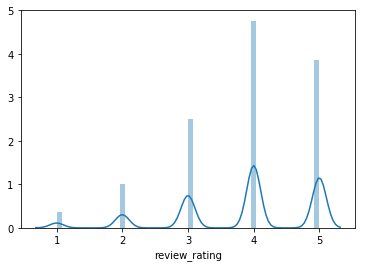

In [37]:
sns.distplot(vegas_sentiments['review_rating'])
plt.show()

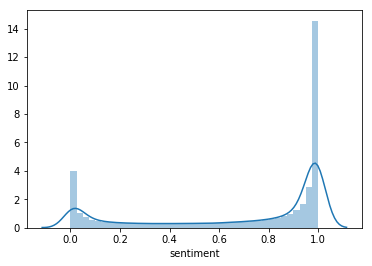

In [38]:
sns.distplot(vegas_sentiments['sentiment'])
plt.show()

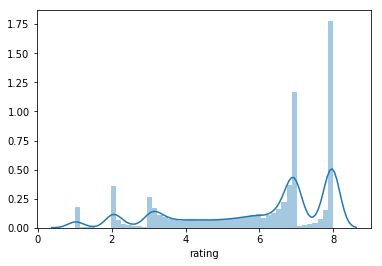

In [39]:
sns.distplot(vegas_sentiments['rating'])
plt.show()

In [40]:
print(vegas_sentiments['rating'].median())
print(vegas_sentiments['rating'].mean())

6.783713161945343
5.921877757775908


In [41]:
vegas_sentiments['review_rating'].corr(vegas_sentiments['sentiment'])

0.7821539952157075

In [42]:
import copy

In [93]:
vegas_sentiments1 = copy.deepcopy(vegas_sentiments)
vegas_sentiments1.loc[vegas_sentiments1['rating'] < 6.4, 'rating'] = 0
vegas_sentiments1.loc[vegas_sentiments1['rating'] > 6.4, 'rating'] = 1
vegas_sentiments1.head()

,user_id,business_id,review_rating,sentiment,rating
0,nOTl4aPC4tKHK35T3bNauQ,9Jc3W0aR9Xf2gcHI0rEXsw,1,0.001898,0.0
1,gU_sKjppz47562zsiccDLw,9Jc3W0aR9Xf2gcHI0rEXsw,5,0.607713,1.0
2,TBEiWGQoVXCq5sYuOzeBkw,9Jc3W0aR9Xf2gcHI0rEXsw,3,0.008583,0.0
3,o0_SrfBy_H5UY98auVa3EQ,9Jc3W0aR9Xf2gcHI0rEXsw,3,0.129926,0.0
4,I9e80hahLUuqyvM0ft3EdA,9Jc3W0aR9Xf2gcHI0rEXsw,2,0.013002,0.0


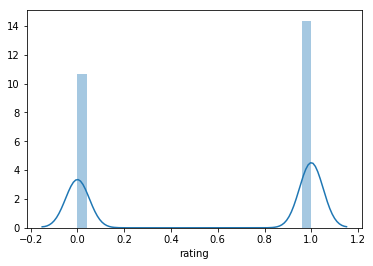

In [44]:
sns.distplot(vegas_sentiments1['rating'])
plt.show()

In [45]:
import collections

In [46]:
counter = collections.Counter(vegas_sentiments1['rating'])
counter.most_common(3)

[(1.0, 70432), (0.0, 52187)]

In [47]:
freq1s = counter.most_common(2)[0][1]/len(vegas_sentiments1)
freq0s = counter.most_common(2)[1][1]/len(vegas_sentiments1)
print(freq1s, freq0s)

0.5743971162707248 0.42560288372927524


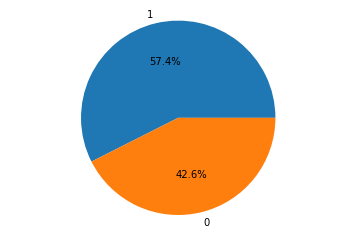

In [48]:
labels = '1', '0'
sizes = [70432, 52187]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

In [67]:
vegas_sentiments1.head()

,user_id,business_id,review_rating,sentiment,rating
0,nOTl4aPC4tKHK35T3bNauQ,9Jc3W0aR9Xf2gcHI0rEXsw,1,0.001898,0.0
1,gU_sKjppz47562zsiccDLw,9Jc3W0aR9Xf2gcHI0rEXsw,5,0.607713,1.0
2,TBEiWGQoVXCq5sYuOzeBkw,9Jc3W0aR9Xf2gcHI0rEXsw,3,0.008583,0.0
3,o0_SrfBy_H5UY98auVa3EQ,9Jc3W0aR9Xf2gcHI0rEXsw,3,0.129926,0.0
4,I9e80hahLUuqyvM0ft3EdA,9Jc3W0aR9Xf2gcHI0rEXsw,2,0.013002,0.0


In [68]:
vegas_sentiments1 = vegas_sentiments1.drop(['review_rating', 'sentiment'], axis=1)

In [69]:
vegas_sentiments1.head()

,user_id,business_id,rating
0,nOTl4aPC4tKHK35T3bNauQ,9Jc3W0aR9Xf2gcHI0rEXsw,0.0
1,gU_sKjppz47562zsiccDLw,9Jc3W0aR9Xf2gcHI0rEXsw,1.0
2,TBEiWGQoVXCq5sYuOzeBkw,9Jc3W0aR9Xf2gcHI0rEXsw,0.0
3,o0_SrfBy_H5UY98auVa3EQ,9Jc3W0aR9Xf2gcHI0rEXsw,0.0
4,I9e80hahLUuqyvM0ft3EdA,9Jc3W0aR9Xf2gcHI0rEXsw,0.0


In [74]:
user_sentiments = vegas_sentiments1.pivot(index='user_id', columns='business_id', values='rating')

In [75]:
user_sentiments.fillna(0)

business_id,-95mbLJsa0CxXhpaNL4LvA,-IWsoxH7mLJTTpU5MmWY4w,-K82LBrI3H0FVuhTbNDpRA,-Le6cwbZL4tDZwNHwipfKg,-LzUYsR54hd8cCiYXTquRA,-NR4KqS6lHseNvJ-GFzfMA,-P8dGzSVhJi-5oZ-8U2y0w,-PGsEXB6DFTVKa1eDOlzWA,-QNQ4R1VgRoL4b6lC8Anrg,-RJ216TTIghZshCkUlD1WQ,...,zRqi6L1u-YmmVAHjeUbGMQ,zU9w_xRlQSRIYXxGo-HSOA,zUc67X2Tn8Xi1bJFvOX2fA,zXBrfL_ohYMuBZWvF8EcSA,zcScEL0WEdFkROcnz5379g,zkhBU5qW_zCy0q4OEtIrsA,zm-nB9xWL0RWZ-zoL7JNuQ,zpoZ6WyQUYff18-z4ZU1mA,zsQk990PubOHjr1YcLkQFw,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
---1lKK3aKOuomHnwAkAow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--2vR0DIsmQ6WfcSzKWigw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--3WaS23LcIXtxyFULJHTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--41c9Tl0C9OGewIR7Qyzg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--4uW4yJiRT2oXMYkCPq1Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--56mD0sm1eOogphi2FFLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--YhjyV-ce1nFLYxP49C5A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--ZNfWKj1VyVElRx6-g1fg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--u09WAjW741FdfkJXxNmg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
user_sentiments.head()

business_id,-95mbLJsa0CxXhpaNL4LvA,-IWsoxH7mLJTTpU5MmWY4w,-K82LBrI3H0FVuhTbNDpRA,-Le6cwbZL4tDZwNHwipfKg,-LzUYsR54hd8cCiYXTquRA,-NR4KqS6lHseNvJ-GFzfMA,-P8dGzSVhJi-5oZ-8U2y0w,-PGsEXB6DFTVKa1eDOlzWA,-QNQ4R1VgRoL4b6lC8Anrg,-RJ216TTIghZshCkUlD1WQ,...,zRqi6L1u-YmmVAHjeUbGMQ,zU9w_xRlQSRIYXxGo-HSOA,zUc67X2Tn8Xi1bJFvOX2fA,zXBrfL_ohYMuBZWvF8EcSA,zcScEL0WEdFkROcnz5379g,zkhBU5qW_zCy0q4OEtIrsA,zm-nB9xWL0RWZ-zoL7JNuQ,zpoZ6WyQUYff18-z4ZU1mA,zsQk990PubOHjr1YcLkQFw,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
---1lKK3aKOuomHnwAkAow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--2vR0DIsmQ6WfcSzKWigw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--3WaS23LcIXtxyFULJHTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--41c9Tl0C9OGewIR7Qyzg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--4uW4yJiRT2oXMYkCPq1Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
np.shape(user_sentiments)

(26174, 1006)

In [76]:
user_sentiments.to_csv('user_sentiments.csv', index=False)

In [68]:
business_attributes = df_combined1.set_index('business_id')

In [69]:
business_attributes.head()

,Acai Bowls,Active Life,Adult Entertainment,Afghan,African,Airport Terminals,Airports,American (New),American (Traditional),Amusement Parks,...,waffle,waiter,water,way,wine,work,wrap,year,yelp,yogurt
business_id,,,,,,,,,,,,,,,,,,,,,
toToUz3HgJjEinwD8_3dGQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ao2V326FZWP4MCsTwUUTNw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
i0EtEzlEkOho6YcLG29bvw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mYsswaRTS-5NFUifYCW0-Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zsxx8hT5-4wObIpZrFmfhA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
np.shape(business_attributes)

(6118, 516)

In [57]:
business_attributes.to_csv('business_attributes.csv')

In [58]:
business_attributes = pd.read_csv("business_attributes.csv")
business_attributes.head()

,business_id,Acai Bowls,Active Life,Adult Entertainment,Afghan,African,Airport Terminals,Airports,American (New),American (Traditional),...,waffle,waiter,water,way,wine,work,wrap,year,yelp,yogurt
0,toToUz3HgJjEinwD8_3dGQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ao2V326FZWP4MCsTwUUTNw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,i0EtEzlEkOho6YcLG29bvw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mYsswaRTS-5NFUifYCW0-Q,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Zsxx8hT5-4wObIpZrFmfhA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
business_attributes.sort_index(inplace=True)

In [71]:
business_attributes.head()

,Acai Bowls,Active Life,Adult Entertainment,Afghan,African,Airport Terminals,Airports,American (New),American (Traditional),Amusement Parks,...,waffle,waiter,water,way,wine,work,wrap,year,yelp,yogurt
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--q7kSBRb0vWC8lSkXFByA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0BxAGlIk5DJAGVkpqBXxg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1m9o3vGRA8IBPNvNqKLmA,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-1uVyyy3UXNA9WoPucNniA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
np.shape(business_attributes)

(6118, 516)

In [78]:
user_sentiments.sort_index(inplace=True)

In [79]:
user_sentiments.head()

,--9e1ONYQuAa-CB_Rrw7Tw,--q7kSBRb0vWC8lSkXFByA,-0BxAGlIk5DJAGVkpqBXxg,-1m9o3vGRA8IBPNvNqKLmA,-1uVyyy3UXNA9WoPucNniA,-1vfRrlnNnNJ5boOVghMPA,-3H_6UZGWrfl8XQsm1fBmw,-46pFijv3f2jZH-_Ze6CQA,-8R_-EkGpUhBk55K9Dd4mg,-8ZiMXZReeTD3kwEvS0Lww,...,zqoPpM4GppNhRp-PkhLeSg,zrMpy_uQ5_77YapMkp8lUA,zrQ1zKWC-W2PCvwjBururQ,zsQk990PubOHjr1YcLkQFw,zt9RLUIU32fZYOBh2L0NNQ,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg,zwddv6HjTjDx9fOr3MFtwQ,zwmKWhyyV-zejEUbQzBtHw,zzzaIBwimxVej4tY6qFOUQ
---1lKK3aKOuomHnwAkAow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0.0,0,0,0
--2vR0DIsmQ6WfcSzKWigw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0.0,0,0,0
--3WaS23LcIXtxyFULJHTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0.0,0,0,0
--41c9Tl0C9OGewIR7Qyzg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0.0,0,0,0
--4uW4yJiRT2oXMYkCPq1Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0.0,0,0,0


In [74]:
np.shape(user_sentiments)

(26174, 6118)

In [125]:
user_profiles = np.matmul(user_sentiments, business_attributes)

In [126]:
np.shape(user_profiles)

(26174, 516)

In [127]:
user_profiles1 = pd.DataFrame(user_profiles)
user_profiles1.head()

,0,1,2,3,4,5,6,7,8,9,...,506,507,508,509,510,511,512,513,514,515
0,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1635.980413,2217.771588,3.8,...,110.2,121.195567,285.0,433.2,270.102753,201.4,178.7555,155.8,148.2,201.4
1,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1622.600000,2204.000000,3.8,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
2,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1625.781052,2204.000000,3.8,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
3,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1622.600000,2204.000000,3.8,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
4,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1625.774982,2204.000000,3.8,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4


In [128]:
user_profiles1.columns = business_attributes.columns
user_profiles1.index = user_sentiments.index

In [129]:
user_profiles1.head()

,Acai Bowls,Active Life,Adult Entertainment,Afghan,African,Airport Terminals,Airports,American (New),American (Traditional),Amusement Parks,...,waffle,waiter,water,way,wine,work,wrap,year,yelp,yogurt
---1lKK3aKOuomHnwAkAow,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1635.980413,2217.771588,3.8,...,110.2,121.195567,285.0,433.2,270.102753,201.4,178.7555,155.8,148.2,201.4
--2vR0DIsmQ6WfcSzKWigw,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1622.600000,2204.000000,3.8,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
--3WaS23LcIXtxyFULJHTA,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1625.781052,2204.000000,3.8,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
--41c9Tl0C9OGewIR7Qyzg,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1622.600000,2204.000000,3.8,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
--4uW4yJiRT2oXMYkCPq1Q,45.6,60.8,26.6,15.2,22.8,3.8,11.4,1625.774982,2204.000000,3.8,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4


In [117]:
user_profiles2 = user_profiles1.drop(['Adult Entertainment'], axis=1)

In [118]:
user_profiles2.head()

,Acai Bowls,Active Life,Afghan,African,Airport Terminals,Airports,American (New),American (Traditional),Amusement Parks,Arabian,...,waffle,waiter,water,way,wine,work,wrap,year,yelp,yogurt
---1lKK3aKOuomHnwAkAow,45.6,60.8,15.2,22.8,3.8,11.4,1635.980413,2217.771588,3.8,7.6,...,110.2,121.195567,285.0,433.2,270.102753,201.4,178.7555,155.8,148.2,201.4
--2vR0DIsmQ6WfcSzKWigw,45.6,60.8,15.2,22.8,3.8,11.4,1622.600000,2204.000000,3.8,7.6,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
--3WaS23LcIXtxyFULJHTA,45.6,60.8,15.2,22.8,3.8,11.4,1625.781052,2204.000000,3.8,7.6,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
--41c9Tl0C9OGewIR7Qyzg,45.6,60.8,15.2,22.8,3.8,11.4,1622.600000,2204.000000,3.8,7.6,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4
--4uW4yJiRT2oXMYkCPq1Q,45.6,60.8,15.2,22.8,3.8,11.4,1625.774982,2204.000000,3.8,7.6,...,110.2,117.800000,285.0,433.2,266.000000,201.4,167.2000,155.8,148.2,201.4


In [104]:
np.shape(user_profiles2)

(26174, 515)

In [ ]:
user_profiles2.replace(to_replace=0, value=)

In [103]:
user_profiles2.groupby(user_profiles2.index)

In [75]:
testing_vegas = pd.read_csv("testing_vegas.csv")
testing_vegas.head()

,Unnamed: 0,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,user_review_count,elite,...,compliments,followers_count,tip_count,category,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent,text
0,448804,0YGqN3oCNwKc7MBOYk5njQ,BUB_t_Rvzs1yPEzZipkWjw,P7pxQFqr7yBKMMI2J51udw,4,Las Vegas,4.0,2771,1866.0,10,...,7034.0,4878.0,1.0,Restaurants,13720,7416,6304,31584,95,The unexpected touches are what elevated this ...
1,434090,CB9uwMe-Aq81z5x3f-llWA,gaPd0k3D9b9vbDnw0MhRrQ,4JNXUYY8wbaaDmk3BPzlWw,5,Las Vegas,4.0,7361,72.0,2,...,15.0,81.0,1.0,Restaurants,19138,9987,9151,31629,95,Wow! Just wow! What a great place to spend a n...
2,2163518,DB5wKcv3PpThBoEn5wzJUA,BgZwJBhVWKq1Urs4rKBdiA,0xzmIBsJQc5eUNLucFrZ0Q,4,Las Vegas,3.5,186,1356.0,3,...,987.0,961.0,1.0,Restaurants,318,170,148,31589,95,"The food was terriffic, my honey gushed over t..."
3,2277358,mPrQdIY8e9u24ohyCoqlQQ,BgZwJBhVWKq1Urs4rKBdiA,iIwKW2cBAxjElE8eUzjwqA,3,Las Vegas,4.0,994,1356.0,3,...,987.0,961.0,1.0,Restaurants,1824,1113,711,31495,95,Solid burger but small with delicious and crea...
4,1890412,y5MdtDyC1TXG_ulpfZgu1w,Vd9hFqOGzttsbjsRJXniCw,QYuojrlW94mpEwnp0uUIWA,2,Las Vegas,4.0,221,148.0,3,...,297.0,262.0,0.0,Restaurants,328,203,125,31281,94,This place wasn't what I expected. First I ha...


In [76]:
testing_vegas.drop(testing_vegas.columns.difference(['user_id','business_id','review_rating']), 1, inplace=True)
testing_vegas.head()

,user_id,business_id,review_rating
0,BUB_t_Rvzs1yPEzZipkWjw,P7pxQFqr7yBKMMI2J51udw,4
1,gaPd0k3D9b9vbDnw0MhRrQ,4JNXUYY8wbaaDmk3BPzlWw,5
2,BgZwJBhVWKq1Urs4rKBdiA,0xzmIBsJQc5eUNLucFrZ0Q,4
3,BgZwJBhVWKq1Urs4rKBdiA,iIwKW2cBAxjElE8eUzjwqA,3
4,Vd9hFqOGzttsbjsRJXniCw,QYuojrlW94mpEwnp0uUIWA,2


In [80]:
testing_vegas.sort_values(by=['user_id'])

,user_id,business_id,review_rating
53696,---1lKK3aKOuomHnwAkAow,Gdv3qhsDeQzZ2Ag-Tzq6vA,5
53692,---1lKK3aKOuomHnwAkAow,RhTBGAHFqnFTgSUDJtBuIQ,5
53693,---1lKK3aKOuomHnwAkAow,AxeQEz3-s9_1TyIo-G7UQw,3
53694,---1lKK3aKOuomHnwAkAow,AZlnpvILz5cEWJifjr2CSQ,5
53695,---1lKK3aKOuomHnwAkAow,RRw9I8pHt5PzgYGT2QeODw,5
53697,---1lKK3aKOuomHnwAkAow,ZgPnRzWjQR5NtiauGBww7g,5
53698,---1lKK3aKOuomHnwAkAow,CWNMLT-ppaUjLMmrnYDPVg,5
53699,---1lKK3aKOuomHnwAkAow,dZB5VuI4mCVRz8qQUwUgCg,1
53700,---1lKK3aKOuomHnwAkAow,iPM85PQMs7QoAxw-Og9ChQ,3
53701,---1lKK3aKOuomHnwAkAow,Ks0M3J4vZAKsHPuCINz5fQ,4


In [77]:
np.shape(testing_vegas)

(59966, 3)

In [85]:
import numpy as np
np.sum(business_attributes)

Acai Bowls                 12
Active Life                16
Adult Entertainment         7
Afghan                      4
African                     6
Airport Terminals           1
Airports                    3
American (New)            427
American (Traditional)    580
Amusement Parks             1
Arabian                     2
Arcades                     2
Argentine                   3
Armenian                    2
Arts & Entertainment       55
Asian Fusion              230
Auto Detailing              1
Auto Glass Services         1
Auto Repair                 2
Automotive                 58
Backshop                    1
Bagels                     54
Bakeries                  249
Bangladeshi                 1
Barbeque                  175
Bars                      396
Basque                      1
Beauty & Spas              21
Beer                      155
Beer Bar                   14
                         ... 
sub                        58
subway                     48
super     